# Quadtree Implementation

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [20]:
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

        
class Node():
    def __init__(self, x0, y0, w, h, points):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.points = points
        self.children = []

    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def get_points(self):
        return self.points
    
    
class QTree():
    def __init__(self, k, n):
        self.threshold = k
        self.points = [Point(random.uniform(0, 10), random.uniform(0, 10)) for x in range(n)]
        self.root = Node(0, 0, 10, 10, self.points)

    def add_point(x, y):
        self.points.append(Point(x, y))
    
    def get_points(self):
        return self.points
    
    def subdivide(self):
        recursive_subdivide(self.root, self.threshold)
    
    def graph(self):
        fig = plt.figure(figsize=(12, 8))
        plt.title("Quadtree")
        ax = fig.add_subplot(111)
        c = find_children(self.root)
        print "Number of segments: %d" %len(c)
        areas = set()
        for el in c:
            areas.add(el.width*el.height)
        print "Minimum segment area: %.3f units" %min(areas)
        for n in c:
            ax.add_patch(patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False))
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.plot(x, y, 'ro')
        plt.show()
        return 

In [21]:
def recursive_subdivide(node, k):
    if len(node.points)<=k:
        return
    
    w_ = float(node.width/2)
    h_ = float(node.height/2)

    p = contains(node.x0, node.y0, w_, h_, node.points)
    x1 = Node(node.x0, node.y0, w_, h_, p)
    recursive_subdivide(x1, k)

    p = contains(node.x0, node.y0+h_, w_, h_, node.points)
    x2 = Node(node.x0, node.y0+h_, w_, h_, p)
    recursive_subdivide(x2, k)

    p = contains(node.x0+w_, node.y0, w_, h_, node.points)
    x3 = Node(node.x0 + w_, node.y0, w_, h_, p)
    recursive_subdivide(x3, k)

    p = contains(node.x0+w_, node.y0+w_, w_, h_, node.points)
    x4 = Node(node.x0+w_, node.y0+h_, w_, h_, p)
    recursive_subdivide(x4, k)

    node.children = [x1, x2, x3, x4]
    
    
def contains(x, y, w, h, points):
    pts = []
    for point in points:
        if point.x >= x and point.x <= x+w and point.y>=y and point.y<=y+h:
            pts.append(point)
    return pts


def find_children(node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children += (find_children(child))
    return children

In [22]:
def test(k, n):
    qt = QTree(k, n)
    qt.subdivide()
    qt.graph()

In [23]:
# Add your own test here!

#test(k, n)

# Examples

Number of segments: 424
Minimum segment area: 0.098 units


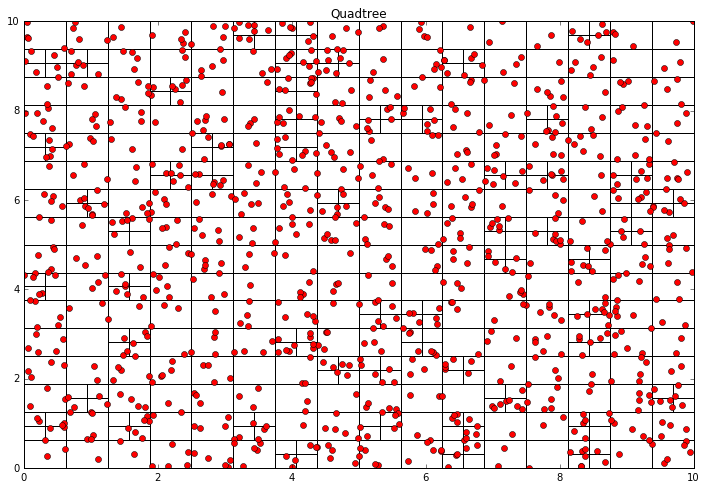

Number of segments: 10
Minimum segment area: 1.562 units


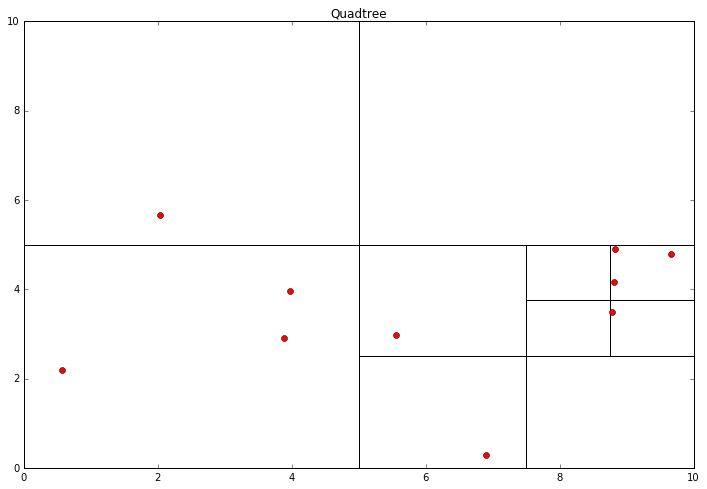

Number of segments: 16
Minimum segment area: 6.250 units


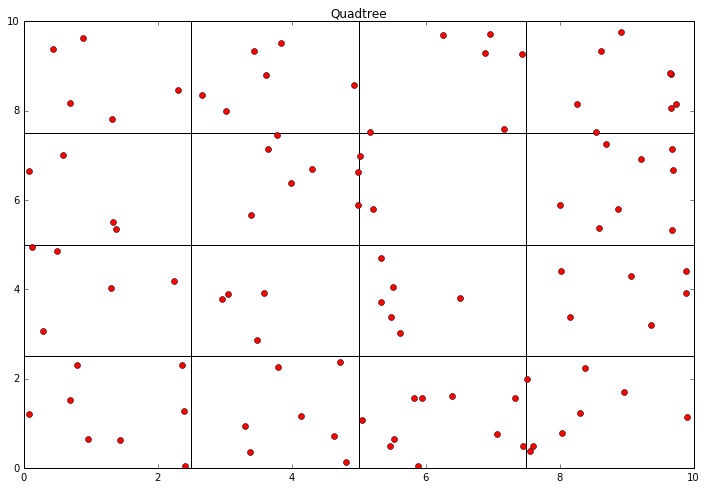

In [25]:
test(5, 1000)
test(3, 10)
test(10, 100)

### Time Complexity
Time complexity approaches O(n)...much better than brute force O(n^2)! When inserting a new point (not implemented in this representation), time will be proportional to the tree's depth.
When searching, the worst case would be all the points clustered so that the tree has a great depth (or, in the above representation, the number of segments is very high). This tree could be considered 'unbalanced', as only some of the segments would be subdivided.
The lower the threshold (k), the more segments will be created and thus the tree's depth will be higher. When the threshold is higher, there will be fewer segments but more points to consider inside each individual segment.
Quadtrees can be thought of as similar to binary search trees in some ways (o(nlogn)). 